In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Given Function:

y = 5 sin(2 * pi * 500t + 90)


In [2]:
# Variables
start = 0
stop = 0.01
phase = 90
frequency = 500
amplitude = 5
sampling_frequency = 4000
samples_count = sampling_frequency * (stop-start)

# Conversion
phase_radian = (phase * np.pi/180)

Min:  -4.98378654067105 
Max:  5.0
Step Size: 3.3279288468903503


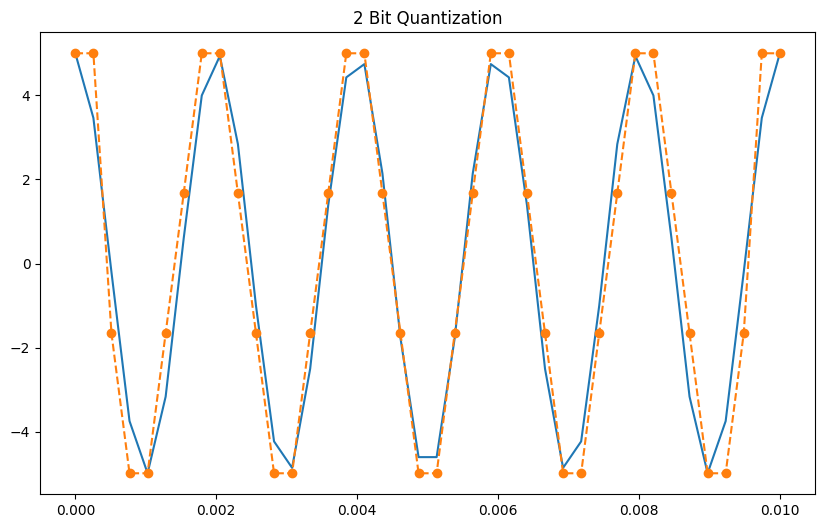

In [3]:
# Quantization
quantization_bit = 2

t = np.linspace(start=start, stop=stop, num=int(samples_count))
y = amplitude * np.sin((2 * np.pi * frequency * t) + phase_radian)

min = y.min()
max = y.max()
print("Min: ", min, "\nMax: ", max)
step_size = (max-min)/((2**quantization_bit)-1)
# quantized_values = (np.round(y/step_size)) * step_size
quantized_values = (np.round((y - min)/step_size)) * step_size + min   # Shakil's Contribution
# quantized_values = quantized_values - (np.min(quantized_values) - min)  # Shift to find the min labels
# print(quantized_values)
quantization_error = (quantized_values - y)
print(f'Step Size: {step_size}')
# print(f'Quantization Error: {quantization_error}')

plt.figure(figsize=(10, 6))
plt.title(f'{quantization_bit} Bit Quantization')
plt.plot(t, y)
plt.plot(t, quantized_values, linestyle='--', marker='o')
plt.show()